# Aula 1

## Vídeo 1.2

Já se perguntou como as fazendas decidem o que e quanto plantar para otimizar seus lucros? Imagine que você está no comando da Fazenda VerdeVida, famosa por seus tomates e alfaces frescos. Sua tarefa é alocar os recursos de água e espaço de maneira eficiente, visando maximizar a produção e, claro, o lucro.

Na VerdeVida, a venda de um quilo de tomates rende um lucro de R\$ 2,00, enquanto um quilo de alfaces traz um lucro de R\$ 1,50. Cada escolha na distribuição dos recursos impacta diretamente na quantidade total produzida e no retorno financeiro.

Vamos aos detalhes: cada quilo de tomates necessita de 3 litros de água e ocupa 2 metros quadrados de espaço. Já a alface requer 2 litros de água por quilo e ocupa 3 metros quadrados de espaço. A fazenda tem uma reserva diária de 6000 litros de água e 5.500 metros quadrados de terra arável.

Mas há mais um aspecto a considerar: a diversificação. Para garantir uma produção diversificada e reduzir os riscos, a fazenda adota uma política de diversificação. Segundo essa política, a quantidade de tomates produzidos deve ser pelo menos 10% da quantidade de alfaces. Essa restrição ajuda a manter um equilíbrio na produção, evitando que a fazenda dependa excessivamente de um único tipo de cultivo.

Como você planejaria a distribuição dos recursos entre tomates e alfaces para alcançar o maior lucro possível, respeitando as limitações de água, espaço e a necessidade de diversificação?

Essa é a essência da programação linear aplicada à agricultura: encontrar o equilíbrio ideal entre os recursos disponíveis e as necessidades das diferentes culturas. Ao alocar estrategicamente esses recursos, a fazenda pode maximizar a produção e otimizar seu retorno financeiro.

Então, prepare-se para mergulhar nos cálculos e análises. Vamos explorar como a Fazenda VerdeVida pode usar a programação linear para tomar decisões inteligentes, aumentando a produção e maximizando os lucros. Junte-se a nós nesta viagem educativa e descubra como tomar decisões estratégicas para um cultivo mais produtivo e lucrativo!

In [ ]:
lucro_por_tipo = {
  "Tomate": 2.00,
  "Alface": 1.50
}

In [ ]:
# Lucro por quilo de cada tipo de alimento
lucro_por_tipo = {
    "Tomate": 2.00,
    "Alface": 1.50
}

In [ ]:
# Demanda de recursos por quilo de cada tipo de alimento
# Agora, removemos o 'tempo_cuidado' e ajustamos as quantidades de água e espaço
demanda_por_tipo = {
    "Tomate": {"agua": 3, "espaco": 2},
    "Alface": {"agua": 2, "espaco": 3}
}

In [ ]:
# Disponibilidade total de recursos na fazenda
disponibilidade_recursos = {
    "agua": 5900,   # litros disponíveis
    "espaco": 5400  # metros quadrados de terra arável
}

## Vídeo 1.3

Para entender como maximizar a produção de tomates e alfaces na Fazenda VerdeVida, é crucial calcular a capacidade máxima de produção de cada um, levando em conta os recursos limitados disponíveis. A produção máxima será limitada pelo recurso mais escasso em relação às necessidades de cada alimento.

Vamos calcular a produção máxima possível de tomates, considerando os recursos necessários por quilograma e a disponibilidade total desses recursos:

$$\displaystyle \text{Máximo Tomates} = \min \left\{\frac{\text{Água disponível}}{\text{Água necessária por kg de tomate}}, \frac{\text{Espaço disponível}}{\text{Espaço necessário por kg de tomate}}\right\}$$

Para os tomates, isso se traduz em:

$$\displaystyle \text{Máximo Tomates} = \min \left\{\frac{6000 \text{ litros}}{3 \text{ litros/kg}}, \frac{5500 \text{ m}^2}{2 \text{ m}^2/\text{kg}}\right\}$$

Analogamente, a produção máxima de alfaces é calculada da seguinte forma:

$$\displaystyle \text{Máximo Alfaces} = \min \left\{\frac{\text{Água disponível}}{\text{Água necessária por kg de alface}}, \frac{\text{Espaço disponível}}{\text{Espaço necessário por kg de alface}}\right\}$$

Para as alfaces, a fórmula seria:

$$\displaystyle \text{Máximo Alfaces} = \min \left\{\frac{6000 \text{ litros}}{2 \text{ litros/kg}}, \frac{5500 \text{ m}^2}{3 \text{ m}^2/\text{kg}}\right\}$$

Com esses cálculos, podemos explorar diferentes combinações de produção de tomates e alfaces dentro dos limites máximos estabelecidos para cada um, e calcular o lucro esperado para cada combinação. Importante lembrar de verificar se as combinações de produção não ultrapassam a disponibilidade total de recursos, já que ambos os vegetais compartilham a mesma água e espaço na fazenda. Este cuidado nos ajudará a tomar decisões mais estratégicas e lucrativas na gestão da produção agrícola.

In [ ]:
# Cálculo do máximo que pode ser produzido para cada tipo de vegetal
max_tomate = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Tomate"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Tomate"]["espaco"]
)

In [ ]:
max_alface = min(
    disponibilidade_recursos["agua"] / demanda_por_tipo["Alface"]["agua"],
    disponibilidade_recursos["espaco"] / demanda_por_tipo["Alface"]["espaco"]
)

In [ ]:
max_tomate

1966.6666666666667

In [ ]:
max_alface

1800.0

Para explorar o potencial da Fazenda VerdeVida no cultivo de tomates e alfaces, vamos desenvolver uma função que calcule o lucro total dessa produção, considerando as restrições de água e espaço. Essa abordagem nos permite analisar diferentes combinações de produção dos dois vegetais e avaliar o lucro que cada uma pode gerar.

Vamos considerar que cada quilo de tomate gera um lucro de R\$ 2,00 e cada quilo de alface, R\$ 1,50. Porém, é crucial garantir que as combinações escolhidas para o plantio não ultrapassem a disponibilidade de água e espaço na fazenda.



In [ ]:
def calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface):
    # Calcula o uso total de água e espaço para as quantidades escolhidas de tomate e alface
    uso_agua = qtd_tomate * demanda_por_tipo["Tomate"]["agua"] + qtd_alface * demanda_por_tipo["Alface"]["agua"]
    uso_espaco = qtd_tomate * demanda_por_tipo["Tomate"]["espaco"] + qtd_alface * demanda_por_tipo["Alface"]["espaco"]

    restricoes = {"agua": uso_agua, "espaco": uso_espaco, "diversificacao": (qtd_alface, qtd_tomate)}

    # Verifica se a combinação de produção viola as restrições de recursos e diversificação
    viola_restricoes = (
        uso_agua > disponibilidade_recursos["agua"] or
        uso_espaco > disponibilidade_recursos["espaco"] or
        qtd_tomate < 10/100*qtd_alface
    )

    # Calcula o lucro total
    lucro = qtd_tomate * lucro_por_tipo["Tomate"] + qtd_alface * lucro_por_tipo["Alface"]

    return lucro, viola_restricoes, restricoes


Assim conseguimos testar quantidades de produção e verificar o lucro, se violamos alguma restrição ou não e os recursos utilizados.

In [ ]:
calcular_lucro_e_viabilidade(16, 0)

(32.0, False, {'agua': 48, 'espaco': 32, 'diversificacao': (0, 16)})

In [ ]:
calcular_lucro_e_viabilidade(16, 0)

(32.0, False, {'agua': 48, 'espaco': 32, 'diversificacao': (0, 16)})

In [ ]:
calcular_lucro_e_viabilidade(10, 5)

(27.5, False, {'agua': 40, 'espaco': 35, 'diversificacao': (5, 10)})

Para explorar as melhores combinações de cultivo de tomates e alfaces na Fazenda VerdeVida, vamos desenvolver um código que testa diferentes quantidades de produção de ambos os vegetais. Nosso objetivo é identificar a combinação que oferece o maior lucro, respeitando as limitações de recursos como água e espaço disponíveis na fazenda.

Vamos criar um script que simule várias configurações de plantio, analisando cada uma delas para verificar se cumpre as restrições de água e espaço. Ao mesmo tempo, o código calculará o lucro potencial de cada configuração, permitindo-nos identificar a melhor estratégia de produção.

Esse processo nos ajudará a tomar uma decisão informada sobre como alocar os recursos da fazenda de maneira mais eficiente, garantindo uma produção otimizada e lucrativa. Este é um exemplo prático de como a programação linear pode ser aplicada no mundo real, especialmente em cenários de gestão de recursos na agricultura.

In [ ]:
lista_solucoes = []

# Testando diferentes combinações de produção de tomates e alfaces
for qtd_tomate in range(0, int(max_tomate) + 1, 100):
    for qtd_alface in range(0, int(max_alface) + 1, 100):
        lucro, viola, restricoes = calcular_lucro_e_viabilidade(qtd_tomate, qtd_alface)
        lista_solucoes.append([qtd_tomate, qtd_alface, lucro, viola, restricoes])

        # Se a combinação não viola as restrições, imprime a solução
        if not viola:
            print(f"Tomate: {qtd_tomate} kg, Alface: {qtd_alface} kg, Lucro: R$ {lucro:.2f}")



Tomate: 0 kg, Alface: 0 kg, Lucro: R$ 0.00
Tomate: 100 kg, Alface: 0 kg, Lucro: R$ 200.00
Tomate: 100 kg, Alface: 100 kg, Lucro: R$ 350.00
Tomate: 100 kg, Alface: 200 kg, Lucro: R$ 500.00
Tomate: 100 kg, Alface: 300 kg, Lucro: R$ 650.00
Tomate: 100 kg, Alface: 400 kg, Lucro: R$ 800.00
Tomate: 100 kg, Alface: 500 kg, Lucro: R$ 950.00
Tomate: 100 kg, Alface: 600 kg, Lucro: R$ 1100.00
Tomate: 100 kg, Alface: 700 kg, Lucro: R$ 1250.00
Tomate: 100 kg, Alface: 800 kg, Lucro: R$ 1400.00
Tomate: 100 kg, Alface: 900 kg, Lucro: R$ 1550.00
Tomate: 100 kg, Alface: 1000 kg, Lucro: R$ 1700.00
Tomate: 200 kg, Alface: 0 kg, Lucro: R$ 400.00
Tomate: 200 kg, Alface: 100 kg, Lucro: R$ 550.00
Tomate: 200 kg, Alface: 200 kg, Lucro: R$ 700.00
Tomate: 200 kg, Alface: 300 kg, Lucro: R$ 850.00
Tomate: 200 kg, Alface: 400 kg, Lucro: R$ 1000.00
Tomate: 200 kg, Alface: 500 kg, Lucro: R$ 1150.00
Tomate: 200 kg, Alface: 600 kg, Lucro: R$ 1300.00
Tomate: 200 kg, Alface: 700 kg, Lucro: R$ 1450.00
Tomate: 200 kg, Alfa

## Vídeo 1.4

Para analisar as diferentes combinações de produção de tomate e alface e entender qual delas oferece o melhor retorno em termos de lucro, sem violar as restrições de recursos da fazenda, vamos criar um DataFrame do Pandas. Este DataFrame conterá as quantidades testadas de tomate e alface, o lucro correspondente, se a combinação viola as restrições e quais são essas restrições. Vamos então visualizar os primeiros resultados para ter uma ideia inicial das possíveis soluções viáveis.

In [ ]:
import pandas as pd

# Criando um DataFrame com os resultados
df = pd.DataFrame(lista_solucoes, columns=["qtd_tomate", "qtd_alface", "lucro", "viola_restricoes", "restricoes"])
df.head()  # Visualizando as primeiras linhas do DataFrame/

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
1,0,100,150.0,True,"{'agua': 200, 'espaco': 300, 'diversificacao':..."
2,0,200,300.0,True,"{'agua': 400, 'espaco': 600, 'diversificacao':..."
3,0,300,450.0,True,"{'agua': 600, 'espaco': 900, 'diversificacao':..."
4,0,400,600.0,True,"{'agua': 800, 'espaco': 1200, 'diversificacao'..."


Podemos checar as combinações que não violam algum restrição:

In [ ]:
df.query("viola_restricoes == False")

,qtd_tomate,qtd_alface,lucro,viola_restricoes,restricoes
0,0,0,0.0,False,"{'agua': 0, 'espaco': 0, 'diversificacao': (0,..."
19,100,0,200.0,False,"{'agua': 300, 'espaco': 200, 'diversificacao':..."
20,100,100,350.0,False,"{'agua': 500, 'espaco': 500, 'diversificacao':..."
21,100,200,500.0,False,"{'agua': 700, 'espaco': 800, 'diversificacao':..."
22,100,300,650.0,False,"{'agua': 900, 'espaco': 1100, 'diversificacao'..."
...,...,...,...,...,...
342,1800,0,3600.0,False,"{'agua': 5400, 'espaco': 3600, 'diversificacao..."
343,1800,100,3750.0,False,"{'agua': 5600, 'espaco': 3900, 'diversificacao..."
344,1800,200,3900.0,False,"{'agua': 5800, 'espaco': 4200, 'diversificacao..."
361,1900,0,3800.0,False,"{'agua': 5700, 'espaco': 3800, 'diversificacao..."


Podemos selecionar a melhor solução:

In [ ]:
row_index = df.query("viola_restricoes == False")["lucro"].idxmax()
df.loc[row_index]

qtd_tomate                                                       1500
qtd_alface                                                        700
lucro                                                          4050.0
viola_restricoes                                                False
restricoes          {'agua': 5900, 'espaco': 5100, 'diversificacao...
Name: 292, dtype: object

Embora a abordagem de calcular o lucro e verificar a viabilidade para quantidades específicas de tomate e alface possa parecer um método eficaz inicialmente, ela tem limitações significativas quando buscamos a solução ótima na gestão da produção agrícola.

Essa estratégia não abarca todo o espectro de soluções possíveis. Em vez disso, limita-se a analisar apenas um conjunto restrito de combinações de plantio de tomate e alface. Isso significa que, embora possamos encontrar um cenário lucrativo dentro das combinações testadas, não temos garantia de que seja o melhor possível. Pode haver outras combinações de plantio que resultariam em um lucro ainda maior, mas que não foram consideradas nesta análise preliminar.

Além disso, ao não percorrer todos os valores possíveis, corremos o risco de não identificar soluções que poderiam ser mais vantajosas, tanto do ponto de vista da eficiência no uso de recursos quanto da maximização do lucro. Esta abordagem inicial é útil para uma visão geral, mas para uma tomada de decisão mais precisa e rentável na agricultura, métodos mais sistemáticos e abrangentes, como a programação linear, são essenciais. Eles podem garantir que todas as combinações possíveis de plantio sejam avaliadas, levando a uma solução verdadeiramente otimizada para a fazenda.

# Aula 2

## Vídeo 2.1

No nosso cenário da fazenda, precisamos determinar como maximizar o lucro a partir do plantio de tomates e alfaces, levando em consideração as restrições de recursos como água, espaço e tempo de cuidado.

Vamos representar este problema como um modelo de programação linear, utilizando a seguinte notação matemática:


- **Variáveis de Decisão:**
  - $x_{\text{Tomate}}$: Representa a quantidade de tomates a serem plantados, medida em quilos. Esta variável indica quantos quilos de tomates a fazenda decide produzir.
  - $x_{\text{Alface}}$: Similarmente, representa a quantidade de alfaces a serem plantadas, também em quilos.

- **Função Objetivo:**
  - O objetivo é maximizar o lucro total. O lucro é calculado pela soma do lucro obtido pelo plantio de tomates e alfaces. A função objetivo é, portanto:

    $$ \text{Maximizar } Z = 2x_{\text{Tomate}} + 1.5x_{\text{Alface}} $$

  Aqui, o lucro por quilo de tomate é R\\$ 2,00 e o lucro por quilo de alface é R\\$ 1,50.

- **Restrições:**
  1. **Restrição de Água:**
     A fazenda tem um estoque limitado de água para a irrigação. Esta restrição garante que o total de água usada para os tomates e alfaces não exceda este estoque.

     $$ 3x_{\text{Tomate}} + 2x_{\text{Alface}} \leq 6000 $$

     Cada quilo de tomate requer 3 litros de água e cada quilo de alface requer 2 litros.

  2. **Restrição de Espaço:**
     O espaço para o cultivo é limitado. Esta restrição assegura que a área total ocupada pelas culturas não ultrapasse a área disponível.

     $$ 2x_{\text{Tomate}} + 3x_{\text{Alface}} \leq 5500 $$

     Cada quilo de tomate requer 2 metros quadrados de terra, enquanto cada quilo de alface requer 1 metro quadrado.

  3. **Restrição de Diversificação:**
     Para garantir uma diversificação mínima na produção, a quantidade de tomate plantado deve ser pelo menos 10% da quantidade de alface plantada.

     $$ x_{\text{Tomate}} \geq 0.1 \times x_{\text{Alface}} $$

- **Restrições de Não-Negatividade:**
  As quantidades de tomate e alface a serem plantadas não podem ser negativas.

  $$ x_{\text{Tomate}} \geq 0, x_{\text{Alface}} \geq 0 $$

Esse modelo ajuda a fazenda a determinar a melhor combinação de cultivo de tomates e alfaces, maximizando o lucro dentro das limitações de recursos de água e espaço, e mantendo uma diversidade mínima na produção. Ao resolver este modelo, obteremos a quantidade ideal de cada vegetal a ser plantado para alcançar o maior lucro possível.

## Vídeo 2.2

Imagine que estamos gerenciando uma fazenda e precisamos decidir quanto plantar de tomates e alfaces para maximizar nosso lucro. Temos restrições de recursos como água, espaço e tempo de cuidado, e queremos fazer uso eficiente desses recursos. Como podemos visualizar esse problema de otimização para tomar uma decisão informada?

Vamos usar um gráfico para ilustrar o problema e identificar a solução ótima. O gráfico mostrará as restrições de recursos como linhas e a área viável onde podemos operar. Isso nos ajudará a entender as limitações e oportunidades na produção de tomates e alfaces.

Este gráfico nos permitirá visualizar claramente as restrições e identificar a região onde o lucro pode ser maximizado, levando em conta as limitações dos recursos da fazenda.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Limites para o gráfico
x_max = 4000  # Máximo para Tomates (em quilos)
y_max = 4000  # Máximo para Alfaces (em quilos)

In [ ]:
# Criando uma matriz de valores para x (Tomates) e y (Alfaces)
x = np.linspace(0, x_max, 400)
y = np.linspace(0, y_max, 400)

In [ ]:
# Restrições
y1 = (5900 - 3*x) / 2  # Restrição de Água
y2 = (5400 - 2*x) / 3       # Restrição de Espaço
y3 = 10*x               # Restrição de Diversificação (Tomates pelo menos 10% de Alfaces)

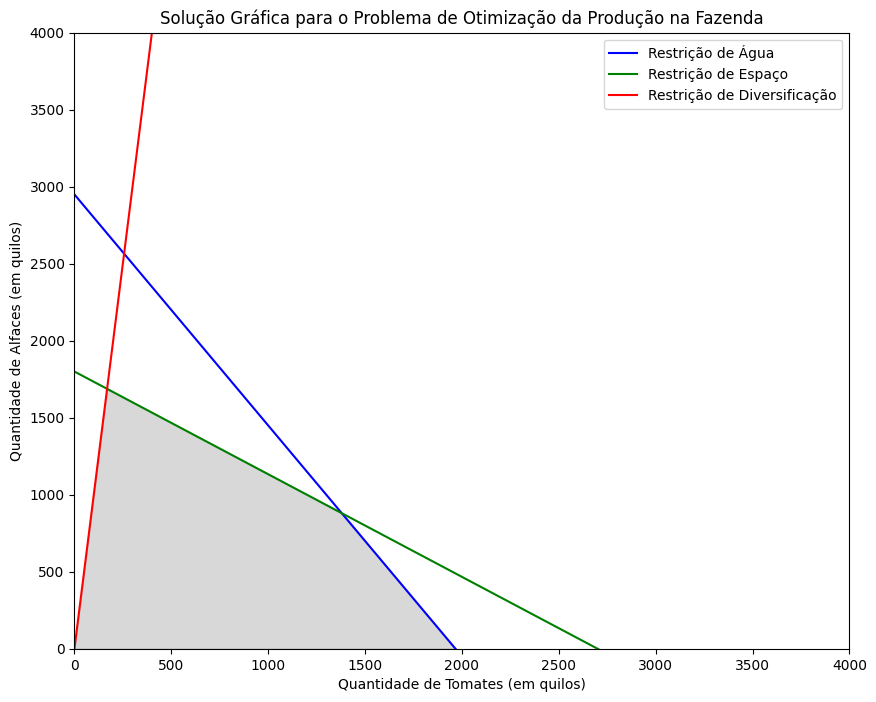

In [ ]:
plt.figure(figsize=(10, 8))

# Área de solução viável
plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y1, color='b', label='Restrição de Água')
plt.plot(x, y2, color='g', label='Restrição de Espaço')
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()

Quando plotamos as restrições de um problema de programação linear em um gráfico, identificamos uma área conhecida como "região viável". Esta região é delimitada pelas linhas das restrições e representa todas as soluções possíveis que respeitam essas restrições.

No nosso exemplo da fazenda, as restrições são relacionadas à quantidade de água, espaço disponíveis e diversificação. Ao plotar essas restrições em um gráfico, as linhas formadas delimitam uma área - essa é a nossa região viável. Qualquer ponto dentro dessa área representa uma combinação de quantidades de tomate e alface que a fazenda pode produzir sem ultrapassar os limites de água e espaço. Em outras palavras, são as soluções que cumprem todas as condições impostas pelas restrições.

**Retas e Hiperplanos**

Em programação linear, as restrições são representadas por equações lineares, o que significa que, em um gráfico, elas serão sempre retas (ou hiperplanos em casos com mais variáveis). Isso simplifica a visualização e análise do problema. Em nosso exemplo com duas variáveis (tomate e alface), cada restrição é uma linha no gráfico. Com mais variáveis, essas linhas se tornam hiperplanos em um espaço multidimensional.

**O Poliedro de Soluções**

O conjunto de todas as soluções viáveis de um problema de programação linear forma um poliedro. No caso de dois ou três variáveis, este poliedro pode ser visualizado como um polígono ou um poliedro tridimensional. Esse poliedro é um aspecto crucial, pois a solução ótima para um problema de programação linear sempre está em um dos vértices (cantos) deste poliedro.

## Vídeo 2.3

**Encontrando a Solução Ótima com Curvas de Nível**

Na programação linear, as curvas de nível são uma ferramenta visual poderosa para identificar a solução ótima de um problema. Vamos usar o exemplo da nossa fazenda, onde queremos maximizar o lucro da produção de tomates e alfaces, para entender como isso funciona.

**O que são Curvas de Nível?**

As curvas de nível em um gráfico representam pontos que têm o mesmo valor da função objetivo. No nosso caso, cada curva de nível representa um valor diferente de lucro. Por exemplo, uma curva pode indicar um lucro de R\$ 500, outra R\$ 1.000, e assim por diante.

**Como Usar as Curvas de Nível para Encontrar a Solução Ótima?**

1. **Desenhe as Curvas de Nível**: Primeiro, plotamos as curvas de nível da nossa função objetivo no gráfico. Cada curva representa um lucro diferente.

2. **Identifique a Área Viável**: A área viável é a região no gráfico onde todas as restrições do problema são atendidas. No nosso exemplo, é a área que respeita as limitações de água, espaço e a regra de diversificação na produção.

3. **Localize as Curvas de Nível na Área Viável**: As curvas de nível que caem dentro da área viável são as possíveis soluções para o nosso problema.

4. **Encontre a Curva de Nível Mais Alta na Área Viável**: Como queremos maximizar o lucro, precisamos encontrar a curva de nível com o valor mais alto que ainda toca a área viável.

5. **Ponto de Máximo Lucro**: O ponto onde essa curva de nível mais alta toca a borda da área viável é a nossa solução ótima. Este ponto representa a quantidade exata de tomates e alfaces que devemos produzir para obter o máximo lucro.

**Por Que Usamos Curvas de Nível?**

Curvas de nível são úteis porque permitem visualizar como o lucro (ou qualquer outra função objetivo) muda com diferentes combinações de variáveis de decisão. Na programação linear, geralmente a solução ótima é encontrada nos cantos ou nas bordas da área viável. As curvas de nível ajudam a identificar qual desses pontos oferece o maior valor para a função objetivo.

**Conclusão**

Usar curvas de nível para encontrar a solução ótima em um problema de programação linear é uma técnica visual intuitiva. Ela ajuda a entender não apenas onde a solução ótima pode estar, mas também como diferentes estratégias de produção (ou outras variáveis de decisão) impactam o resultado final, como o lucro em nosso caso. Isso torna as curvas de nível uma ferramenta indispensável na caixa de ferramentas de qualquer pessoa que lida com otimização.

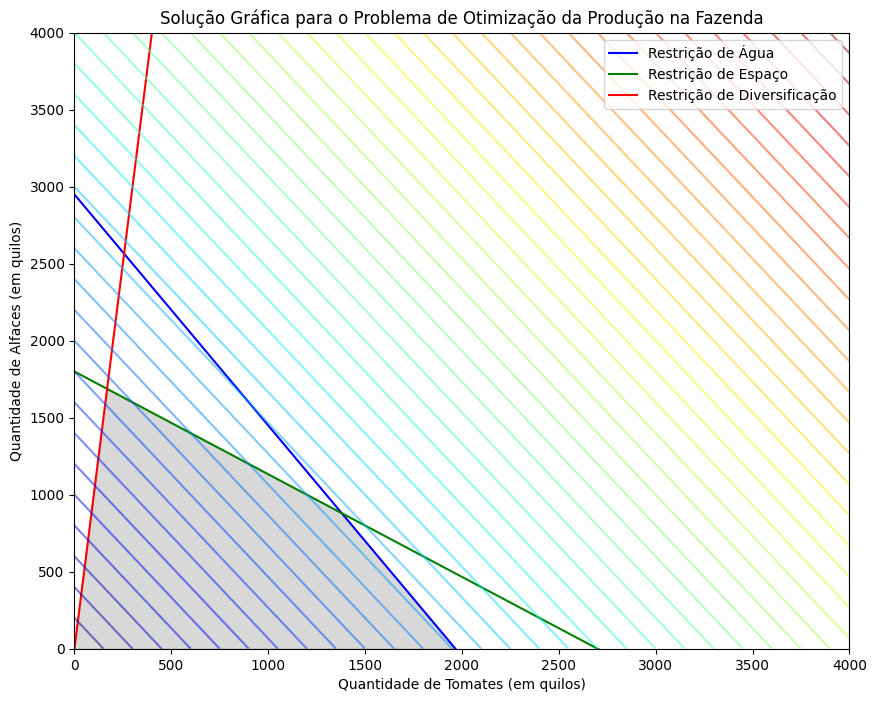

In [ ]:
plt.figure(figsize=(10, 8))

# Área de solução viável
plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y1, color='b', label='Restrição de Água')
plt.plot(x, y2, color='g', label='Restrição de Espaço')
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Curvas de nível para a função objetivo
X, Y = np.meshgrid(x, y)

# Função objetivo: Z = 2x_Tomate + 1.5x_Alfaces
Z = 2*X + 1.5*Y

plt.contour(X, Y, Z, 50, alpha=0.5, cmap='jet')


# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()

A área cinza mostra todas as combinações possíveis de produção de tomates e alfaces que satisfazem as restrições de água, espaço e diversificação.
As linhas coloridas representam os limites impostos por cada restrição.
As curvas de nível ilustram como o lucro varia com diferentes combinações de produção. A localização da curva de nível mais alta que toca a área viável indica a solução ótima - a combinação de produção de tomates e alfaces que maximiza o lucro da fazenda.
Este gráfico é uma ferramenta poderosa para entender visualmente como as restrições e a função objetivo interagem no problema de otimização da produção na fazenda.

# Aula 3

No universo da programação linear, já exploramos a ideia de encontrar uma solução ótima - aquela que melhor atende ao objetivo do nosso modelo, maximizando ou minimizando a função objetivo dentro das restrições estabelecidas. Mas, além da solução ótima, existem outras categorias de soluções que podem surgir ao resolvermos problemas de programação linear.

## Vídeo 3.1

Imagine que, na Fazenda VerdeVida, descobrimos que as estimativas de lucro para tomates e alfaces eram mais promissoras do que inicialmente prevíamos. Em vez dos lucros por quilo serem R\$ 2,00 para tomates e R\$ 1,50 para alfaces, eles são, na verdade, R\$ 3,00 para tomates e R\$ 2,00 para alfaces.

Essa mudança no cenário financeiro nos leva a questionar: como esses novos números afetarão o modelo que construímos? Especificamente, estamos interessados em entender como as curvas de nível, que representam a função objetivo no gráfico da solução, serão impactadas por essas mudanças.

Vamos reavaliar nosso modelo, ajustando os parâmetros para esses novos valores. Ao fazer isso, poderemos visualizar como as curvas de nível se alteram e, consequentemente, como a solução ótima pode mudar. Isso nos ajudará a entender a sensibilidade do nosso modelo a mudanças nas variáveis de lucro e nos custos associados ao espaço.

Essa análise não apenas nos permite reavaliar as estratégias de plantio na Fazenda VerdeVida, mas também nos oferece insights valiosos sobre a importância de manter nossos modelos atualizados com as informações mais recentes e precisas. Ao adaptar nosso modelo para refletir essas mudanças, garantimos que as decisões tomadas sejam as mais benéficas possíveis, dadas as novas circunstâncias.

Portanto, vamos explorar como as novas curvas de nível nos guiam para uma solução potencialmente diferente e, possivelmente, mais lucrativa para a fazenda.

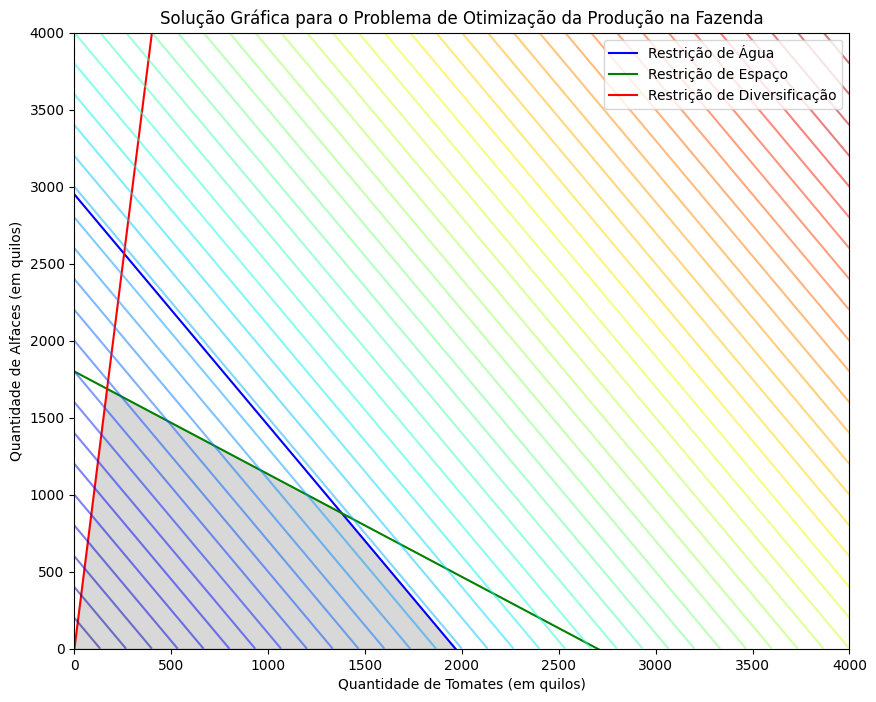

In [ ]:
plt.figure(figsize=(10, 8))

# Área de solução viável
plt.fill_between(x, 0, np.minimum(np.minimum(y1, y2), y3), where=(y1 >= 0) & (y2 >= 0) & (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y1, color='b', label='Restrição de Água')
plt.plot(x, y2, color='g', label='Restrição de Espaço')
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Curvas de nível para a função objetivo
X, Y = np.meshgrid(x, y)

# Função objetivo: Z = 2x_Tomate + 1.5x_Alfaces
Z = 3*X + 2*Y

plt.contour(X, Y, Z, 50, alpha=0.5, cmap='jet')


# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()

Ao olhar para o gráfico do nosso modelo da Fazenda VerdeVida, percebemos algo interessante sobre as curvas de nível da função objetivo e a restrição de espaço. Essas curvas, que representam diferentes valores de lucro, aparecem como linhas paralelas à linha que representa a restrição de espaço. Isso acontece porque a relação entre os lucros de tomates e alfaces é proporcional à relação de espaço que eles ocupam.

Agora, quando observamos atentamente o gráfico, notamos que uma dessas curvas de nível toca exatamente a linha da restrição de espaço. Isso significa que, ao longo de toda essa linha, conseguimos o mesmo valor de lucro. Em outras palavras, há várias combinações diferentes de quantidades de tomates e alfaces que nos darão o mesmo lucro máximo.

Neste cenário específico, dizemos que temos "múltiplas soluções". Isso quer dizer que, dentro das restrições que temos (água, espaço, diversificação), existem várias maneiras diferentes de combinar a produção de tomates e alfaces que resultarão no mesmo lucro máximo.

Portanto, ao invés de haver apenas uma única melhor maneira de distribuir nossos recursos, existem várias combinações possíveis que nos levam ao mesmo resultado final em termos de lucro. Isso é um exemplo fascinante de como a programação linear pode revelar uma variedade de soluções ótimas, dependendo das condições e restrições específicas do problema.

## Vídeo 3.2

Imagine um cenário na Fazenda VerdeVida onde, por uma conjunção de circunstâncias favoráveis, os produtores se deparam com um mês atípico: não há limitações de espaço ou água para a produção de tomates e alfaces. Neste mês, as condições climáticas são ideais, e a fazenda conseguiu expandir temporariamente sua área cultivável sem restrições adicionais de irrigação.

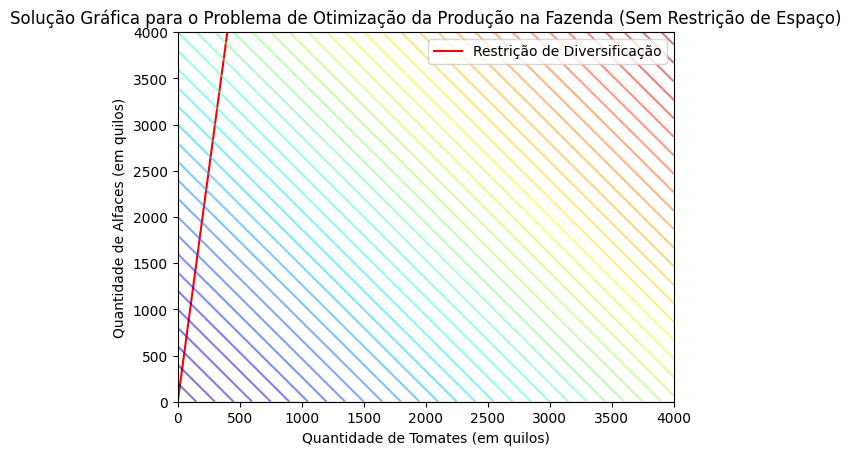

In [ ]:
# Área de solução viável
plt.fill_between(x, 0, (y3 >= 0), color='gray', alpha=0.3)

# Linhas de restrição
plt.plot(x, y3, color='r', label='Restrição de Diversificação')

# Curvas de nível para a função objetivo
X, Y = np.meshgrid(x, y)

# Função objetivo: Z = 2x_Tomate + 1.5x_Alfaces
Z = 2*X + 1.5*Y

plt.contour(X, Y, Z, 50, alpha=0.5, cmap='jet')

# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda (Sem Restrição de Espaço)')
plt.legend()

# Mostrar gráfico
plt.show()

Neste gráfico, a ausência da restrição de espaço significa que a área viável se expande indefinidamente em uma direção, indicando que a solução ótima pode não ser limitada pelos recursos disponíveis. Em outras palavras, à medida que aumentamos a produção, o lucro continua crescendo sem um limite definido, caracterizando uma solução ilimitada. Ou seja, os produtores enfrentam um cenário de "solução ilimitada": eles podem aumentar a produção de tomates e alfaces indefinidamente sem se preocupar com a escassez de recursos. A produção pode crescer sem limites, e, teoricamente, o lucro também. Mas, isso realmente faz sentido?

Ao encarar um cenário de solução ilimitada na Fazenda VerdeVida, devemos questionar se o modelo que estamos utilizando está bem formulado. Em situações reais, é muito raro que um sistema não tenha limitações, seja de recursos, capacidade produtiva ou outros fatores externos.

Se, ao remover restrições de água e espaço, nosso modelo sugere que a produção pode crescer indefinidamente, isso pode indicar que outras variáveis importantes não foram consideradas. Por exemplo, a mão de obra disponível, a capacidade de distribuição e venda dos produtos, ou até mesmo fatores ambientais e de sustentabilidade.

Além disso, a própria formulação da função objetivo pode ser revista. Se o objetivo fosse minimizar a produção (por exemplo, em um cenário de excesso de oferta no mercado), mesmo com espaço e água ilimitados, teríamos uma solução finita - não produzir nada.

Essa reflexão é crucial em programação linear: um modelo é tão bom quanto a realidade que ele consegue capturar. Se um cenário de solução ilimitada surge, é um convite para reavaliarmos as premissas do nosso modelo e garantir que ele esteja alinhado com as limitações e objetivos do mundo real.

## Vídeo 3.3

Suponha que a Fazenda VerdeVida tenha firmado um contrato com um grande distribuidor de produtos agrícolas. Este contrato estipula que a fazenda deve garantir um mínimo de utilização de um recurso específico, como fertilizantes ou pesticidas naturais, para manter a qualidade e a sustentabilidade de seus produtos. Este recurso é utilizado em proporções diferentes para tomates e alfaces. A nova exigência do contrato é que a fazenda deve usar pelo menos o equivalente a 3000 unidades desse recurso, onde o cultivo de um quilo de tomates uma unidade do recurso, enquanto o cultivo de um quilo de alfaces usa também uma unidade. Matematicamente teríamos a seguinte restrição:


$$ x_{\text{Tomate}} + x_{\text{Alface}} \geq 3000 $$


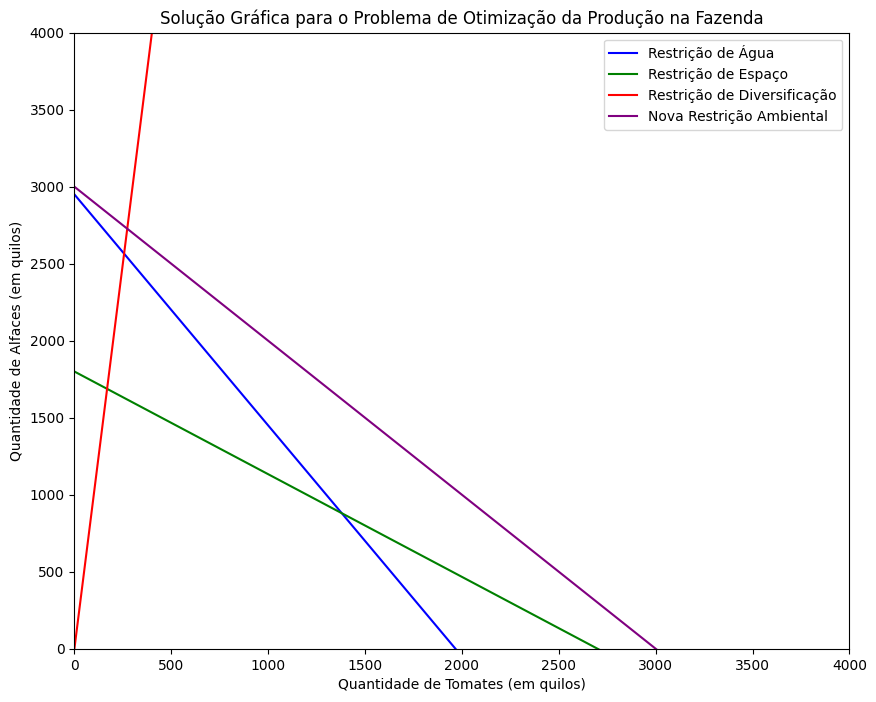

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Limites para o gráfico
x_max = 4000  # Máximo para Tomates (em quilos)
y_max = 4000  # Máximo para Alfaces (em quilos)

# Criando uma matriz de valores para x (Tomates) e y (Alfaces)
x = np.linspace(0, x_max, 400)

# Restrições
y1 = (5900 - 3*x) / 2  # Restrição de Água para Alfaces
y2 = (5400 - 2*x) / 3  # Restrição de Espaço
y3 = 10*x              # Restrição de Diversificação (Tomates pelo menos 10% de Alfaces)
y4 = 3000 - x        # Correção da restrição ambiental

plt.figure(figsize=(10, 8))

# Linhas de restrição
plt.plot(x, y1, label='Restrição de Água', color='blue')
plt.plot(x, y2, label='Restrição de Espaço', color='green')
plt.plot(x, y3, label='Restrição de Diversificação', color='red')
plt.plot(x, y4, label='Nova Restrição Ambiental', color='purple')



# Eixos e limites
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('Quantidade de Tomates (em quilos)')
plt.ylabel('Quantidade de Alfaces (em quilos)')

# Adicionando título e legenda
plt.title('Solução Gráfica para o Problema de Otimização da Produção na Fazenda')
plt.legend()

# Mostrar gráfico
plt.show()



Ao analisarmos a representação gráfica do nosso modelo da Fazenda VerdeVida, chegamos a uma conclusão crucial: a inviabilidade completa do cenário apresentado. Vamos entender melhor o que isso significa:

1. **Ausência de Soluções Viáveis:**
   A inclusão da restrição $x_{\text{Tomate}} + y_{\text{Alface}} \geq 3000$ resultou em um cenário onde não existe nenhum ponto que satisfaça todas as restrições simultaneamente. Isso significa que, dadas as condições atuais do modelo, não há solução viável – não há combinação de produção de tomates e alfaces que atenda a todas as exigências impostas.

2. **Possível Mau Formulamento do Problema:**
   A inviabilidade do modelo sugere que pode haver um erro ou uma suposição irrealista na formulação do problema. Talvez as restrições adicionadas sejam demasiadamente rígidas ou contraditórias. Em termos práticos, isso indicaria que os objetivos de produção da fazenda, juntamente com as limitações de recursos, estão configurados de uma maneira que não pode ser concretizada.

3. **Reavaliação e Ajuste Necessários:**
   Esse resultado nos leva à necessidade de revisitar o modelo e as premissas sobre as quais ele foi construído. É fundamental questionar cada restrição e objetivo para verificar se refletem adequadamente a realidade e as capacidades da fazenda. O desafio aqui é reestruturar o modelo para que ele se torne viável, ajustando metas, alterando restrições ou repensando a distribuição de recursos.

Em suma, a inviabilidade encontrada é uma oportunidade para aprender e aprimorar. Ela destaca a necessidade de revisão e ajuste contínuos em nossos modelos e estratégias para garantir que eles sejam não apenas ambiciosos, mas também realistas e aplicáveis à realidade que pretendem modelar.

# Aula 4

## Vídeo 4.1

**Introdução ao Pyomo e GLPK: Ferramentas Essenciais para a Programação Linear**

No mundo da otimização e da programação linear, duas ferramentas se destacam por sua eficiência e facilidade de uso: Pyomo e GLPK. Vamos explorar o que são essas ferramentas e por que são tão importantes no nosso contexto de solução de problemas de programação linear.

**Pyomo - Python Optimization Modeling Objects**

Pyomo é uma biblioteca de modelagem de otimização em Python. Ela oferece uma plataforma poderosa para a definição de modelos de otimização abstratos e concretos, que podem ser resolvidos usando uma variedade de solvers. O Pyomo é reconhecido por sua capacidade de modelar problemas complexos de forma intuitiva e flexível, aproximando o mundo da programação linear e da otimização ao universo dos desenvolvedores Python.

**Principais Características do Pyomo:**

1. **Flexibilidade:** Permite a criação de modelos de otimização complexos que podem ser ajustados e reformulados facilmente.
2. **Integração com Python:** Tira proveito das capacidades de programação do Python, facilitando a integração com outras bibliotecas e ferramentas de dados.
3. **Ampla Gama de Solvers:** Compatível com diversos solvers, tanto gratuitos quanto comerciais, oferecendo versatilidade na escolha da ferramenta de solução.

**GLPK - GNU Linear Programming Kit**

GLPK é um solver de programação linear (e inteira) que faz parte do projeto GNU. É uma ferramenta gratuita e de código aberto que resolve problemas de otimização linear. O GLPK é conhecido por sua confiabilidade e é amplamente utilizado tanto em ambientes acadêmicos quanto industriais.

**Por Que Utilizamos GLPK com Pyomo?**

A combinação de Pyomo com GLPK cria um ambiente de modelagem e solução de problemas de otimização poderoso e acessível. Enquanto Pyomo nos permite construir e manipular o modelo de otimização, o GLPK atua como o motor que efetivamente resolve o problema, encontrando a solução ótima.

**Importância no Nosso Contexto:**

No contexto dos nossos estudos e projetos em programação linear, a combinação de Pyomo e GLPK oferece várias vantagens:

- **Acessibilidade:** Ambas as ferramentas são gratuitas e de código aberto, tornando-as acessíveis a todos.
- **Eficiência:** Permite resolver problemas complexos de otimização de maneira eficiente.
- **Flexibilidade e Integração:** Podemos integrar nossos modelos de otimização com outras análises e dados em Python, enriquecendo nossas soluções e análises.

Ao utilizar o Pyomo para construir nossos modelos e o GLPK para resolvê-los, estamos equipados com um conjunto de ferramentas robusto e versátil, adequado para enfrentar uma ampla gama de desafios de otimização no mundo real.

Primeiro precisamos instalar o Pyomo e GLPK.


In [ ]:
!pip install pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00


Para instalar o GLPK no Google Colab, usamos comandos de linha de comando do Linux, já que o Colab é baseado em uma máquina virtual Linux. O comando específico para instalar o GLPK é:

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

Agora, vamos construir nosso modelo no Pyomo, seguindo a estrutura do problema:

In [ ]:
import pyomo.environ as pyo

# Criando um modelo concreto
modelo = pyo.ConcreteModel()

# Definindo as variáveis de decisão
modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

# Definindo a função objetivo
modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)

# Adicionando as restrições
modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 5900)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5400)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)


## Vídeo 4.2

Depois de definir nosso modelo de programação linear para a Fazenda VerdeVida no Pyomo, o próximo passo é resolvê-lo para encontrar a estratégia ideal de produção. Para isso, usaremos o GLPK (GNU Linear Programming Kit), um solver que é capaz de resolver modelos lineares.

O código a seguir representa a etapa de resolução do nosso modelo:

In [ ]:

# Resolvendo o modelo
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)


GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp3y9g9qhr.glpk.raw --wglp /tmp/tmpwlbmqfvd.glpk.glp --cpxlp
 /tmp/tmpis6vpqs_.pyomo.lp
Reading problem data from '/tmp/tmpis6vpqs_.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpwlbmqfvd.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   4.080000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmp3y9g9qhr.glpk.raw'...
14 lines were written


**Interpretação do Log do GLPK**

Ao resolver o modelo, o GLPK gera um log de atividades, mostrando o processo de otimização. Vamos entender o que cada parte deste log significa:

1. **Início do Log:** "GLPSOL--GLPK LP/MIP Solver 5.0" indica que estamos usando a versão 5.0 do GLPK para resolver um problema de programação linear (LP) ou de programação inteira mista (MIP).

2. **Leitura dos Dados:** O solver lê os dados do problema de um arquivo temporário, indicando o número de linhas lidas e de variáveis e restrições envolvidas.

3. **Otimizador Simplex:** "GLPK Simplex Optimizer 5.0" refere-se ao método Simplex utilizado pelo GLPK para resolver problemas de programação linear.

4. **Preprocessamento e Escalonamento:** O solver prepara os dados para otimização e verifica se eles estão bem dimensionados para evitar problemas numéricos durante a otimização.

5. **Construção da Base Inicial:** O solver constrói uma base inicial para começar a iteração do Simplex.

6. **Iterações do Simplex:** O solver executa as iterações do Simplex, ajustando as variáveis para encontrar a solução ótima. O "* 0:" e "* 2:" indicam o número de iterações, com o valor da função objetivo e a infactibilidade (inf) para essas iterações.

7. **Solução Ótima Encontrada:** "OPTIMAL LP SOLUTION FOUND" significa que o solver encontrou a solução ótima para o problema.

8. **Uso de Tempo e Memória:** O log também informa o tempo e a memória utilizados pelo solver durante o processo.

9. **Escrita da Solução:** Finalmente, o solver grava a solução encontrada em um arquivo temporário.

Este log é crucial para entender como o solver chegou à solução, especialmente em casos de problemas mais complexos ou quando algo não ocorre conforme o esperado. Ele fornece insights valiosos sobre o processo de otimização e a eficiência do modelo.

Após construir e resolver o modelo de programação linear usando o Pyomo, agora vamos exibir os resultados. Isso inclui verificar a quantidade ótima de tomates e alfaces que a Fazenda VerdeVida deve plantar para maximizar seu lucro, considerando todas as restrições de recursos. As próximas linhas de código mostrarão esses valores ótimos.


In [ ]:

# Exibindo resultados
modelo.x_tomate.display()
modelo.x_alface.display()


x_tomate : Size=1, Index=None
    Key  : Lower : Value  : Upper : Fixed : Stale : Domain
    None :     0 : 1380.0 :  None : False : False : NonNegativeReals
x_alface : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 : 880.0 :  None : False : False : NonNegativeReals


O output acima nos fornece os resultados chave para a nossa otimização.

- `x_tomate` mostra a quantidade ótima de tomates a serem plantados. No nosso caso, a fazenda deve plantar 1380 quilos de tomates. Esta quantidade foi calculada para garantir o máximo lucro dentro das restrições de recursos disponíveis.

- `x_alface` indica a quantidade ótima de alfaces, que é aproximadamente 880 quilos. Esta quantidade é bastante maior do que a dos tomates, refletindo a diferença nos lucros e nos recursos necessários para cada tipo de planta.

Ambas as variáveis são definidas como `NonNegativeReals`, o que significa que as quantidades de plantio não podem ser negativas, uma condição essencial para a realidade da fazenda.

Esses resultados nos dão uma visão clara sobre como a Fazenda VerdeVida pode alocar seus recursos de forma eficiente para maximizar os lucros, equilibrando a produção de tomates e alfaces de acordo com suas capacidades e restrições.


Após descobrir os valores ótimos para a produção de tomates e alfaces, vamos apresentá-los de uma maneira mais clara e direta. Utilizaremos comandos de impressão para mostrar não apenas a quantidade ideal de cada vegetal a ser plantada, mas também o lucro total que a Fazenda VerdeVida pode esperar obter com esta produção. Isso nos dará uma visão completa do impacto da nossa solução de otimização.


In [ ]:

# Imprimindo a solução
print(f"Quantidade de Tomate: {pyo.value(modelo.x_tomate)} kg")
print(f"Quantidade de Alface: {pyo.value(modelo.x_alface)} kg")
print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")


Quantidade de Tomate: 1380.0 kg
Quantidade de Alface: 880.0 kg
Lucro total: R$ 4080.0


Com base nos resultados impressos acima, podemos ver claramente os frutos do nosso modelo de otimização:

- **Quantidade de Tomate:** O modelo sugere que a fazenda deve plantar aproximadamente 1380 kg de tomates. Esta é a quantidade ideal para maximizar o lucro, levando em conta todas as restrições de recursos.

- **Quantidade de Alface:** De forma similar, o modelo indica que plantar cerca de 900 kg de alfaces é a melhor estratégia para a fazenda, dadas as condições atuais.

- **Lucro Total:** O mais importante, o lucro total que a fazenda pode esperar com esta distribuição de plantio é de aproximadamente  R$ 880. Este valor representa o retorno financeiro máximo possível sob as condições estabelecidas no nosso modelo.

Esses insights são cruciais para a Fazenda VerdeVida, pois oferecem uma estratégia clara e baseada em dados para otimizar sua produção e maximizar seus lucros. Isso demonstra o poder da programação linear na tomada de decisões estratégicas no mundo real.


## Vídeo 4.3

Em nosso estudo de caso sobre a Fazenda VerdeVida, exploramos um modelo focado na produção otimizada de tomates e alfaces. No entanto, no mundo real da agricultura, as fazendas muitas vezes lidam com uma variedade de culturas. Portanto, é crucial que nosso modelo seja flexível e generalizável para abranger diferentes tipos de alimentos.

A generalização do modelo não apenas reflete mais precisamente a complexidade do planejamento agrícola, mas também fornece à fazenda ferramentas mais robustas para tomar decisões estratégicas. Com um modelo generalizado, podemos facilmente ajustar ou expandir a gama de culturas, considerando os recursos disponíveis, as condições do mercado e as preferências dos consumidores.

Dessa forma, ao ampliar nosso modelo para incluir uma diversidade maior de alimentos, estamos não só aumentando sua aplicabilidade e utilidade, mas também preparando os produtores para um cenário agrícola mais dinâmico e variado.

Para generalizar o modelo de programação linear para incluir mais alimentos, precisamos ajustar as variáveis de decisão, a função objetivo e as restrições para abranger todos os tipos de alimentos que queremos considerar. Vamos supor que agora temos um conjunto de diferentes alimentos que a fazenda pode plantar, cada um com seu próprio lucro, demanda por recursos e restrições.

**Modelagem Matemática:**

- **Variáveis de Decisão:**
  - $x_{i}$: Representa a quantidade do alimento $i$ a ser plantada, medida em quilos.

- **Função Objetivo:**
  - Maximizar o lucro total, que agora é a soma dos lucros obtidos pelo plantio de cada tipo de alimento.
    
$$ \text{Maximizar } Z = \sum_{i \in \text{Alimentos}} \text{lucro}_i \cdot x_{i} $$

- **Restrições:**
  1. **Restrição de Recursos (Água, Espaço, etc.):**
     Para cada recurso $r$, a soma do recurso usado por todos os alimentos não deve exceder a disponibilidade desse recurso.

$$ \sum_{i \in \text{Alimentos}} \text{demanda}_{i,r} \cdot x_{i} \leq \text{disponibilidade}_r, \; \forall r \in \text{Recursos} $$


  2. **Restrições de Não-Negatividade:**
     As quantidades de cada alimento a serem plantadas não podem ser negativas.
     $$ x_{i} \geq 0, \; \forall i \in \text{Alimentos} $$

Podemos implementar isso da seguinte forma:


In [ ]:
import pyomo.environ as pyo

In [ ]:
# Dados do problema
alimentos = ['Tomate', 'Alface', 'Cenoura', 'Batata']
recursos = ['agua', 'espaco']

lucro_por_alimento = {'Tomate': 2.00, 'Alface': 1.50, 'Cenoura': 1.80, 'Batata': 1.20}
demanda_por_alimento = {
    'Tomate': {'agua': 3, 'espaco': 2},
    'Alface': {'agua': 2, 'espaco': 1},
    'Cenoura': {'agua': 4, 'espaco': 3},
    'Batata': {'agua': 5, 'espaco': 2.5}
}
disponibilidade_recursos = {'agua': 20000, 'espaco': 10000}

In [ ]:
# Modelo
modelo = pyo.ConcreteModel()

In [ ]:
# Variáveis de decisão
modelo.x = pyo.Var(alimentos, domain=pyo.NonNegativeReals)

In [ ]:
# Função objetivo
modelo.lucro = pyo.Objective(expr=sum(lucro_por_alimento[i] * modelo.x[i] for i in alimentos), sense=pyo.maximize)

In [ ]:
# Restrições
for r in recursos:
    modelo.add_component(f'restricao_{r}',
                         pyo.Constraint(expr=sum(demanda_por_alimento[i][r] * modelo.x[i] for i in alimentos) <= disponibilidade_recursos[r]))


In [ ]:
# Resolver o modelo
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpa4rqvcpn.glpk.raw --wglp /tmp/tmptjn5568n.glpk.glp --cpxlp
 /tmp/tmpr539dajx.pyomo.lp
Reading problem data from '/tmp/tmpr539dajx.pyomo.lp'...
2 rows, 4 columns, 8 non-zeros
31 lines were read
Writing problem data to '/tmp/tmptjn5568n.glpk.glp'...
23 lines were written
GLPK Simplex Optimizer 5.0
2 rows, 4 columns, 8 non-zeros
Preprocessing...
2 rows, 4 columns, 8 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 2
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (4)
*     3: obj =   1.500000000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpa4rqvcpn.glpk.raw'...
15 lines were written


In [ ]:
# Imprimir resultados
for alimento in alimentos:
    print(f"Produção de {alimento}: {pyo.value(modelo.x[alimento])} kg")
print(f"Lucro total: R$ {pyo.value(modelo.lucro)}")


Produção de Tomate: 0.0 kg
Produção de Alface: 10000.0 kg
Produção de Cenoura: 0.0 kg
Produção de Batata: 0.0 kg
Lucro total: R$ 15000.0


# Aula 5

Em nosso modelo de fazenda, determinamos a melhor estratégia de plantio para maximizar o lucro. Mas, o que acontece se a disponibilidade de água ou espaço for ligeiramente diferente do que previmos? Ou se quisermos saber até que ponto podemos expandir uma cultura sem perder a eficiência? Estas questões são fundamentais para uma gestão eficaz da fazenda e podem ser exploradas através da análise de sensibilidade, mais especificamente, analisando as 'folgas' nas restrições.

As 'folgas' nos indicam o quanto podemos aumentar ou diminuir um recurso (como água ou espaço) antes que a solução ótima mude. Por exemplo, se tivermos uma folga positiva em nossa restrição de água, isso indica que temos uma certa margem de água que não está sendo utilizada na solução ótima atual.

## Vídeo 5.1

Vamos explorar como realizar essa análise no nosso modelo de fazenda usando Pyomo.

In [ ]:
# Criando um modelo concreto
modelo = pyo.ConcreteModel()

In [ ]:
# Definindo as variáveis de decisão
modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

In [ ]:
# Definindo a função objetivo
modelo.lucro = pyo.Objective(expr=2*modelo.x_tomate + 1.5*modelo.x_alface, sense=pyo.maximize)


In [ ]:
# Adicionando as restrições
modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate + 2*modelo.x_alface <= 5900)
modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate + 3*modelo.x_alface <= 5400)
modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate >= 0.1*modelo.x_alface)

In [ ]:
solver = pyo.SolverFactory('glpk')
resultado = solver.solve(modelo, tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpkqctcyd8.glpk.raw --wglp /tmp/tmp63umg0nv.glpk.glp --cpxlp
 /tmp/tmpwx6504vi.pyomo.lp
Reading problem data from '/tmp/tmpwx6504vi.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmp63umg0nv.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   4.080000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpkqctcyd8.glpk.raw'...
14 lines were written


Após resolver o modelo, podemos verificar as folgas nas restrições:

In [ ]:
# Exibindo as folgas das restrições
agua_folga = modelo.restricao_agua.slack()
espaco_folga = modelo.restricao_espaco.slack()
diversificacao_folga = modelo.restricao_diversificacao.slack()

print(f"Folga na Restrição de Água: {agua_folga}")
print(f"Folga na Restrição de Espaço: {espaco_folga}")
print(f"Folga na Restrição de Diversificação: {diversificacao_folga}")


Folga na Restrição de Água: 0.0
Folga na Restrição de Espaço: 0.0
Folga na Restrição de Diversificação: 1292.0


Esses números revelam insights valiosos. As folgas zero na restrição de água e espaço indicam que estas restrições são *ativas*. Uma restrição ativa é aquela que influencia diretamente a solução ótima. Em outras palavras, qualquer pequena alteração na disponibilidade de água ou nas exigências de diversificação de culturas mudará o resultado ótimo do nosso modelo.

Por outro lado, a folga significativa na restrição de diversidade (1292) sugere que esta restrição é *inativa* em nossa solução ótima atual. Isso significa que temos uma quantidade considerável de produção de tomate em relação a produção de 10% de alface.

**Importância das Restrições Ativas e Inativas**

A distinção entre restrições ativas e inativas é crucial na análise de sensibilidade. As restrições ativas são aquelas onde precisamos focar nossa atenção para otimizações ou ajustes futuros, pois elas são as que limitam nossa capacidade de maximizar o lucro. As restrições inativas, por outro lado, indicam áreas onde temos certa margem para manobra ou expansão sem prejudicar o resultado ótimo.

Em resumo, essa análise de sensibilidade fornece uma compreensão profunda dos limites e potenciais do nosso modelo de fazenda, permitindo-nos fazer ajustes informados e planejar estrategicamente para o futuro.

## Vídeo 5.2

O objetivo principal deste código é analisar como a variação no coeficiente de lucro por unidade de tomate afeta o lucro total obtido, bem como as quantidades ótimas de tomates e alfaces a serem plantadas, dentro de um contexto de otimização linear. Utilizando a biblioteca Pyomo para modelagem, o código define um problema de otimização que maximiza o lucro total das vendas de tomates e alfaces, sujeito a restrições de recursos como água e espaço disponível, além de uma restrição de diversificação que exige que a quantidade de tomates plantados seja pelo menos uma fração da quantidade de alfaces. Através da função `criar_modelo`, o código é capaz de construir e resolver esse problema de otimização para diferentes coeficientes de lucro por unidade de tomate, permitindo uma análise detalhada de como esse parâmetro influencia a decisão de plantio ótima.

In [ ]:
def criar_modelo(coef_tomate):
  modelo = pyo.ConcreteModel()

  modelo.x_tomate = pyo.Var(domain=pyo.NonNegativeReals)
  modelo.x_alface = pyo.Var(domain=pyo.NonNegativeReals)

  modelo.lucro = pyo.Objective(expr=coef_tomate*modelo.x_tomate+1.5*modelo.x_alface,sense=pyo.maximize)

  modelo.restricao_agua = pyo.Constraint(expr=3*modelo.x_tomate+2*modelo.x_alface <=6000)
  modelo.restricao_espaco = pyo.Constraint(expr=2*modelo.x_tomate+3*modelo.x_alface <=5500)
  modelo.restricao_diversificacao = pyo.Constraint(expr=modelo.x_tomate>=0.1*modelo.x_alface)

  solver = pyo.SolverFactory('glpk')
  resultado = solver.solve(modelo,tee=True)

  return modelo

In [ ]:
solver = pyo.SolverFactory('glpk')

In [ ]:
coeficientes_tomate = np.linspace(1.5,2.5,12)

In [ ]:
lucros_otimos = []
quantidades_tomate = []
quantidades_alface = []

In [ ]:
for coef_tomate in coeficientes_tomate:
  modelo = criar_modelo(coef_tomate)
  resultado = solver.solve(modelo,tee=True)

  lucros_otimos.append(pyo.value(modelo.lucro))
  quantidades_tomate.append(pyo.value(modelo.x_tomate))
  quantidades_alface.append(pyo.value(modelo.x_alface))

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpcalqpzhm.glpk.raw --wglp /tmp/tmpytq1ejxd.glpk.glp --cpxlp
 /tmp/tmpy407n0yz.pyomo.lp
Reading problem data from '/tmp/tmpy407n0yz.pyomo.lp'...
3 rows, 2 columns, 6 non-zeros
28 lines were read
Writing problem data to '/tmp/tmpytq1ejxd.glpk.glp'...
19 lines were written
GLPK Simplex Optimizer 5.0
3 rows, 2 columns, 6 non-zeros
Preprocessing...
3 rows, 2 columns, 6 non-zeros
Scaling...
 A: min|aij| =  1.000e-01  max|aij| =  3.000e+00  ratio =  3.000e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (2)
*     2: obj =   3.450000000e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpcalqpzhm.glpk.raw'...
14 lines were written
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /t

Após a definição e resolução do modelo de otimização para cada coeficiente de lucro de tomate, o código coleta os resultados, incluindo o lucro total obtido e as quantidades ótimas de tomates e alfaces para cada cenário. Esses dados são então utilizados para gerar gráficos que ilustram a relação entre o coeficiente de lucro do tomate e os resultados de interesse: o lucro total e as quantidades ótimas de cada vegetal. Essa análise visual, realizada através da biblioteca matplotlib, fornece insights valiosos sobre a sensibilidade do problema de otimização a variações no lucro unitário do tomate, permitindo uma compreensão mais profunda das dinâmicas de decisão envolvidas na gestão de recursos agrícolas e na maximização de lucros sob restrições específicas.

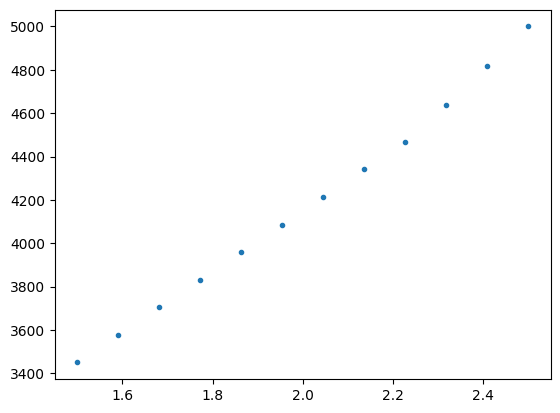

In [ ]:
plt.plot(coeficientes_tomate,lucros_otimos,'.')

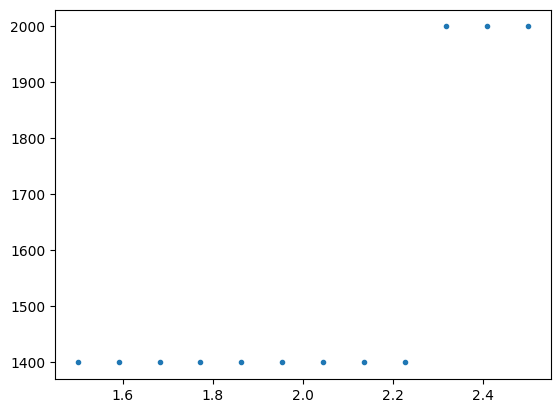

In [ ]:
plt.plot(coeficientes_tomate,quantidades_tomate,'.')

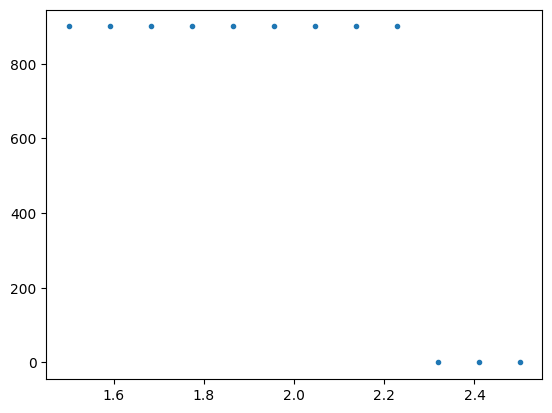

In [ ]:
plt.plot(coeficientes_tomate,quantidades_alface,'.')